In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import nltk
from nltk.stem import *
from nltk.tag import *
from nltk import *
from nltk.tokenize import *
%pylab inline

pd.set_option('display.max_columns', 999)
pd.set_option('display.column_space', 50)
pd.set_option('display.max_rows',1000)

set_matplotlib_formats('retina')
plt.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['stem', 'Text', 'entropy', 'flatten', 'find', 'text', 'choose', 'load', 'draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
df = pd.read_table('train.tsv')
test = pd.read_table('test.tsv')

In [4]:
df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
df.columns = df.columns.str.lower()
test.columns = test.columns.str.lower()

In [6]:
df.loc[df.sentenceid == 2]

,phraseid,sentenceid,phrase,sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize.casual import TweetTokenizer

In [8]:
tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(df['phrase'].values) + list(test['phrase'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df['phrase'])
test_vectorized = vectorizer.transform(test['phrase'])

In [9]:
y = df['sentiment']
logreg = LogisticRegression()

In [10]:
logreg.fit(train_vectorized, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# scores = cross_val_score(logreg, train_vectorized, y, scoring='accuracy', n_jobs=-1, cv=3)
# print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

In [12]:
'Cross-validation mean accuracy 56.55%, std 0.07.'

'Cross-validation mean accuracy 56.55%, std 0.07.'

# Data Processing

In [13]:
# df[df.phrase.str.istitle()]

In [14]:

wanted_tags = ['NNP', 'NNPS']


## Create NNP based on pos tags. NNP = proper nouns
df['NNP'] = df.phrase.apply(lambda x: ' '.join(['NNP' if pos in wanted_tags else word for word, pos in pos_tag(word_tokenize(x))]))
'-----------------------------------------'
test['NNP'] = test.phrase.apply(lambda x: ' '.join(['NNP' if pos in wanted_tags else word for word, pos in pos_tag(word_tokenize(x))]))


##filter out duplicate NNP
df['NNP'] = df.NNP.str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')
'-----------------------------------------'
test['NNP'] = test.NNP.str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')


## Turn NNPs into NNP
df.NNP = df.NNP.str.replace('NNPs','NNP')
'-------------------------------------------------------------'
test.NNP = test.NNP.str.replace('NNPs','NNP')



In [15]:

## replace certain words and get rid of unnecessary words or spaces 
df.NNP = df.NNP.str.replace(" '", "") 
df.NNP = df.NNP.str.replace(" n't", "n't")
df.NNP = df.NNP.str.replace("-LRB-", "")
df.NNP = df.NNP.str.replace("-RRB-", "")
df.NNP = df.NNP.str.replace(".", "")
'-----------------------------------------'
test.NNP = test.NNP.str.replace(" '", "") 
test.NNP = test.NNP.str.replace(" n't", "n't")
test.NNP = test.NNP.str.replace("-LRB-", "")
test.NNP = test.NNP.str.replace("-RRB-", "")
test.NNP = test.NNP.str.replace(".", "")



# turn `` into "" because there are movie names like `` Analyze That '' which in order for regex to find Analyze That (name of movie), you need to turn `` into ""
df.NNP = df.NNP.str.replace("``", '"')
'-----------------------------------------'
test.NNP = test.NNP.str.replace("``", '"')




# Turn ' Analyze That (movie name) ' into NNP
df['NNP'] = df.NNP.str.replace(r'"(.*?)"', 'NNP')
'-----------------------------------------'
test['NNP'] = test.NNP.str.replace(r'"(.*?)"', 'NNP')


# Get rid of duplicate NNPs again
df['NNP'] = df.NNP.str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')
'-----------------------------------------'
test['NNP'] = test.NNP.str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')




In [16]:
# # Get rid of punctuations

# df.NNP = df.NNP.apply(lambda x: re.sub(r'\s([?.!,''"](?:\s|$))', r'\1', x))
# '----------------------------------------------------------------------------------'
# test.NNP = test.NNP.apply(lambda x: re.sub(r'\s([?.!,''"](?:\s|$))', r'\1', x))


# df.NNP = df.NNP.str.replace(",", "")
# '-----------------------------------------'
# test.NNP = test.NNP.str.replace(",", "")

In [17]:
# # Stemming words

# porter = PorterStemmer()

# df.NNP = df.NNP.apply(lambda x: porter.stem(x))
# '---------------------------------------------'
# test.NNP = test.NNP.apply(lambda x: porter.stem(x))



#### Not Much Difference which doesn't make sense to me

In [18]:
tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)

train_vectorized = vectorizer.fit_transform(list(df['NNP'].values))



In [19]:
logreg.fit(train_vectorized, y)

scores = cross_val_score(logreg, train_vectorized, y, scoring='accuracy', n_jobs=-1, cv=3)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

Cross-validation mean accuracy 56.54%, std 0.07.


In [20]:
'Cross-validation mean accuracy 56.54%, std 0.09.'

'Cross-validation mean accuracy 56.54%, std 0.09.'

In [21]:
# Pos Tag didn't take filter all of the proper nouns. The code below is me manually getting all the named entity through this following condition: if first word is capitalized and the next word is capitalized, and so is the next on and so on, all these words become Named Entity Recognition 

namedent = set()

for i in df.index:
    namedent_words = []
    sentence = df.NNP[i].split()

    for index, word in enumerate(sentence):
        next_index = index + 1
        if word.istitle():
            if index < len(sentence) -1:
                if sentence[next_index].istitle():
                    if sentence[index] not in namedent_words:
                        namedent_words.append(sentence[index])
                    if sentence[next_index] not in namedent_words:
                        namedent_words.append(sentence[next_index])
                        
    if namedent_words:
        namedent_joined = ' '.join(namedent_words)
        namedent.add(namedent_joined)

'------------------------------------------------------------------------------------'

test_namedent = set()

for i in test.index:
    test_namedent_words = []
    sentence = test.NNP[i].split()

    for index, word in enumerate(sentence):
        next_index = index + 1
        if word.istitle():
            if index < len(sentence) -1:
                if sentence[next_index].istitle():
                    if sentence[index] not in test_namedent_words:
                        test_namedent_words.append(sentence[index])
                    if sentence[next_index] not in test_namedent_words:
                        test_namedent_words.append(sentence[next_index])
                        
    if test_namedent_words:
        test_namedent_joined = ' '.join(test_namedent_words)
        test_namedent.add(test_namedent_joined)
        
        
                        

In [22]:
list(namedent)[:35]

['Ten Little',
 'Is Red',
 'The French',
 'Red Shoe',
 'Analyze That',
 'Stop The',
 'Nine Queens',
 'Korean American One That I Want',
 'You Can Count On',
 'Bruckheimeresque American',
 'Vertical Limit',
 'Red Shoe Diaries',
 'Conversations About One Thing',
 'The 3-D',
 'Really Awful',
 'A Selection',
 'Watched Trains',
 'The Silence',
 'Watching Spirited',
 'Something Like It',
 'A Few Good Men',
 'Human Nature',
 'With We Were Soldiers',
 'Is This',
 'Two Towers',
 'Count On',
 'The Ring',
 'Queen Of The',
 'The Wrath',
 'Know About Her',
 'The Time',
 'Indecent Proposal',
 'About One',
 'The Lady',
 'African American']

In [23]:
# Change leftover Proper nouns into NNP
df.NNP = df.NNP.apply(lambda x: 'NNP' if x in namedent else x)
'-------------------------------------------------------------'
test.NNP = test.NNP.apply(lambda x: 'NNP' if x in test_namedent else x)



In [24]:
tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
train_vectorized  = vectorizer.fit_transform(list(df['NNP'].values))


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a12350b00>]],
      dtype=object)

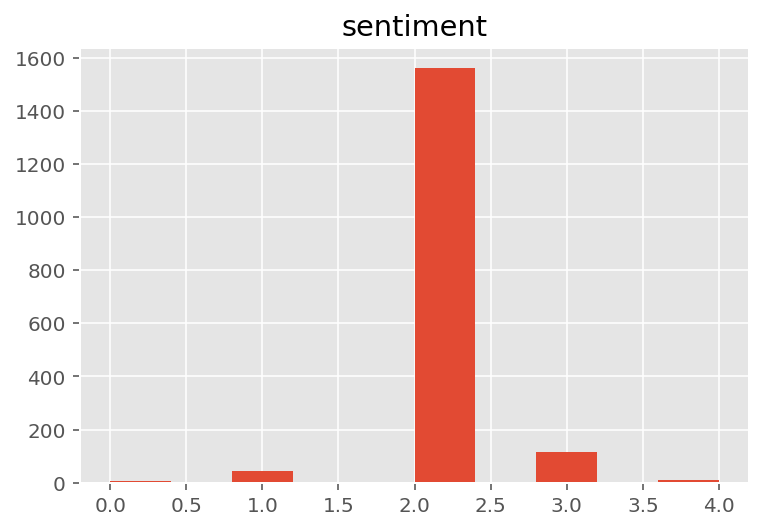

In [25]:
## Most NNP == 2 in sentiment
df[df.NNP.str.contains('NNP')][['NNP','sentiment']][df.NNP == 'NNP'].hist()

In [26]:
logreg.fit(train_vectorized, y)

scores = cross_val_score(logreg, vectorizer.transform(df['NNP']), y, scoring='accuracy', n_jobs=-1, cv=3)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

Cross-validation mean accuracy 56.53%, std 0.08.


## df filtered by unique phrases

In [29]:
unique_phrase_dic = {}

for index, phrase in enumerate(df.phrase):
    if index == 0:
        unique_phrase = phrase
        
        unique_phrase_dic[index] = unique_phrase

    if phrase not in unique_phrase:
        unique_phrase = phrase
    
        unique_phrase_dic[index] = unique_phrase

In [30]:
df_filtered = df.iloc[list(unique_phrase_dic.keys())]

In [31]:
namedent

{'A Better Tomorrow',
 'A Few Good Men',
 'A Few Good Men High Crimes',
 'A French',
 'A Jewish',
 'A Nightmare',
 'A Rumor',
 'A Selection',
 'A Sha-Na-Na',
 'A Song',
 'A Song For',
 'A Walk',
 'A Walk To',
 'A Walk To Remember',
 'About Her',
 'About One',
 'About One Thing',
 'About The',
 'African American',
 'After Next',
 'All About',
 'All About The',
 'All Fears',
 'All That',
 'Although I',
 'Although What',
 'American Beauty',
 'American-Russian Armageddon',
 'An Asian',
 'Analyze That',
 'Analyze This',
 'Analyze This That',
 'And I',
 'And Lacking',
 'Angels With',
 'Another Best',
 'Argentine American',
 'As I',
 'Austin Powers',
 'Being Earnest',
 'Best Friend',
 'Better Tomorrow',
 'Beyond Time',
 'Big Boys',
 'Big Brother',
 'Big Movie',
 'Big Papa',
 'Break Your',
 'Breaking Out',
 'Bruckheimeresque American',
 'Burning Sensation',
 'But I',
 'By The',
 'Can Count On',
 'Can I',
 'Cary Grant',
 'Catch Me',
 'Changing Lanes',
 'Cletis Tout',
 'Close Encounters',
 'Clos

# Vader

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
analyzer = SentimentIntensityAnalyzer()

In [33]:
polarity_dic = {}

for sentence in df.phrase:
    vader_sentiment = analyzer.polarity_scores(sentence).items()
    sent_list = []
    for sentiment in vader_sentiment:
        sent_list.append(sentiment[1])
        
    polarity_dic[sentence] = sent_list

In [34]:
polarity_df = pd.DataFrame(list(polarity_dic.values()), df.reset_index()['index']).rename(columns = {0:'neg', 1:'neu',2:'pos', 3:'compound'})

In [35]:
df_polarity = df.join(polarity_df)

In [36]:
df_polarity.head(14)

,phraseid,sentenceid,phrase,sentiment,NNP,neg,neu,pos,compound
0,1,1,A series of escapades demonstrating the adage ...,1,A series of escapades demonstrating the adage ...,0.0,0.843,0.157,0.5579
1,2,1,A series of escapades demonstrating the adage ...,2,A series of escapades demonstrating the adage ...,0.0,0.805,0.195,0.4404
2,3,1,A series,2,A series,0.0,1.000,0.000,0.0000
3,4,1,A,2,A,0.0,0.000,0.000,0.0000
4,5,1,series,2,series,0.0,1.000,0.000,0.0000
5,6,1,of escapades demonstrating the adage that what...,2,of escapades demonstrating the adage that what...,0.0,0.791,0.209,0.4404
6,7,1,of,2,of,0.0,1.000,0.000,0.0000
7,8,1,escapades demonstrating the adage that what is...,2,escapades demonstrating the adage that what is...,0.0,0.775,0.225,0.4404
8,9,1,escapades,2,escapades,0.0,1.000,0.000,0.0000
9,10,1,demonstrating the adage that what is good for ...,2,demonstrating the adage that what is good for ...,0.0,0.756,0.244,0.4404


In [22]:
# tokenizer = TweetTokenizer()

# vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
# full_text = list(df['phrase'].values) + list(test['phrase'].values)
# vectorizer.fit(full_text)


# features = vectorizer.transform(df_filtered_polarity.NNP).toarray()
# features_added = pd.DataFrame(features).join(df_filtered_polarity.reset_index()['neg, neu, pos, compound'.split(', ')])
# labels = df_filtered.sentiment

# models = []
# models.append(('LR',LogisticRegression()))


# results = []
# names = []

# for name, model in models:
#     kfold =KFold(n_splits = 10)
#     cv_results = cross_val_score(model, features, labels, scoring = 'accuracy')
#     results.append(cv_results)
#     names.append(name)
#     msg = "{} -{}: {}".format(vectorizer.__class__.__name__, name, cv_results.mean())
#     print(msg)

# print('_______________________________')


In [157]:
tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(df['NNP'].values) + list(test['NNP'].values)
vectorizer.fit(full_text)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1a2bce1b38>>,
        use_idf=True, vocabulary=None)

In [ ]:
hstack([vectorizer.transform(df.NNP)])

In [2]:
logreg

logreg.fit(train_vectorized, y)

# train = vectorizer.transform(df_filtered_polarity['NNP']).toarray()
# train_added = pd.DataFrame(train).join(df_filtered_polarity.reset_index()['neg, neu, pos, compound'.split(', ')])

scores = cross_val_score(logreg, train_added, y, scoring='accuracy', n_jobs=-1, cv=3)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

NameError: name 'logreg' is not defined